<a href="https://colab.research.google.com/github/jsm-UOC/tensorflowCourse/blob/main/RegressionANNCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with TensorFlow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


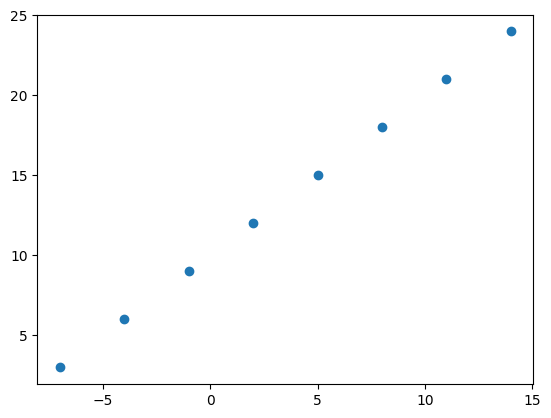

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [ ]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 14.1929 - mae: 14.1929
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 14.0604 - mae: 14.0604
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 13.9279 - mae: 13.9279
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 13.7954 - mae: 13.7954
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.6629 - mae: 13.6629


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[-0.34045023]], dtype=float32)

# Improving our model

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 13.3404 - mae: 13.3404
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 13.1970 - mae: 13.1970
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 13.0567 - mae: 13.0567
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 12.9206 - mae: 12.9206
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 12.7964 - mae: 12.7964
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 12.6801 - mae: 12.6801
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 12.5646 - mae: 12.5646
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 12.4519 - mae: 12.4519
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 12.3413 - mae: 12.3413
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 12.2344 - mae: 12.2344
Epoch 11/1000
1/1 [======================

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[27.39272]], dtype=float32)

# Evaluating models


In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

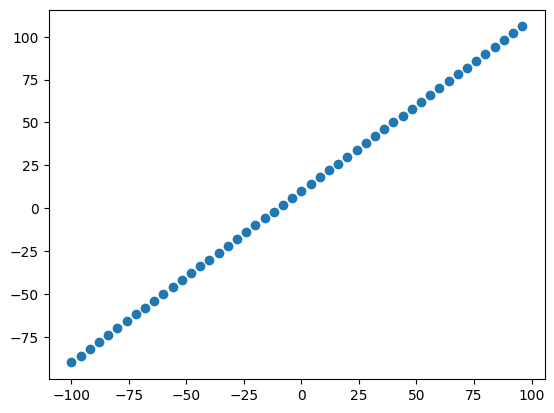

In [ ]:
plt.scatter(X, y)

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

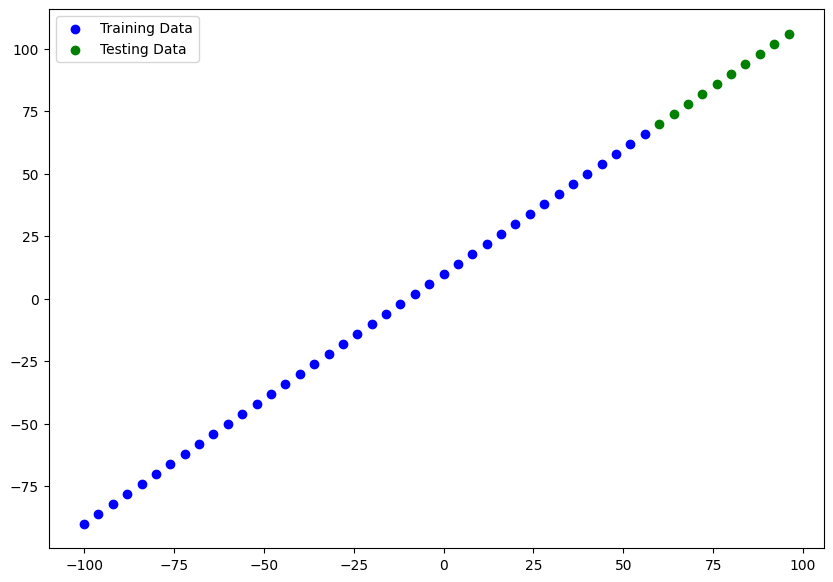

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

In [ ]:
tf.random.set_seed(42)
def huber2(y_true, y_pred, delta=3.0):
  return tf.keras.losses.huber(y_true, y_pred, delta=3.0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, input_shape=[10]),
    tf.keras.layers.Dense(100, input_shape=[100]),
    tf.keras.layers.Dense(1, name="output_layer")
], name="one_model")

model.compile(loss=tf.keras.losses.huber,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              metrics=["mae"])


In [ ]:
model.summary()

Model: "one_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 100)               1100      
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 2s 12ms/step - loss: 38.8979 - mae: 39.3979
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 34.6418 - mae: 35.1386
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 30.5667 - mae: 31.0655
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 26.3955 - mae: 26.8951
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 22.3336 - mae: 22.8330
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 18.2927 - mae: 18.7894
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 14.3355 - mae: 14.8354
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.3707 - mae: 10.8605
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 7.6418 - mae: 8.1345
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 7.8539 - mae: 8.3539
Epoch 11/500
2/2 [==============================] - 0s 7ms/st

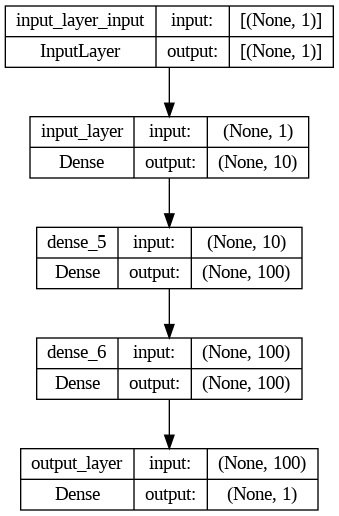

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 87ms/step


(array([[ 70.      ],
        [ 74.00001 ],
        [ 77.99999 ],
        [ 81.99999 ],
        [ 85.999985],
        [ 89.999985],
        [ 93.999985],
        [ 97.99999 ],
        [101.99999 ],
        [105.99999 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
model.evaluate(X_test, y_test), model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 14ms/step - loss: 6.7353e-10 - mae: 3.1304e-05


([2.2526365217601096e-09, 6.561279587913305e-05],
 [6.735280666525512e-10, 3.130436016363092e-05])

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", marker="2", s=100, label="Predictions")
  plt.legend();

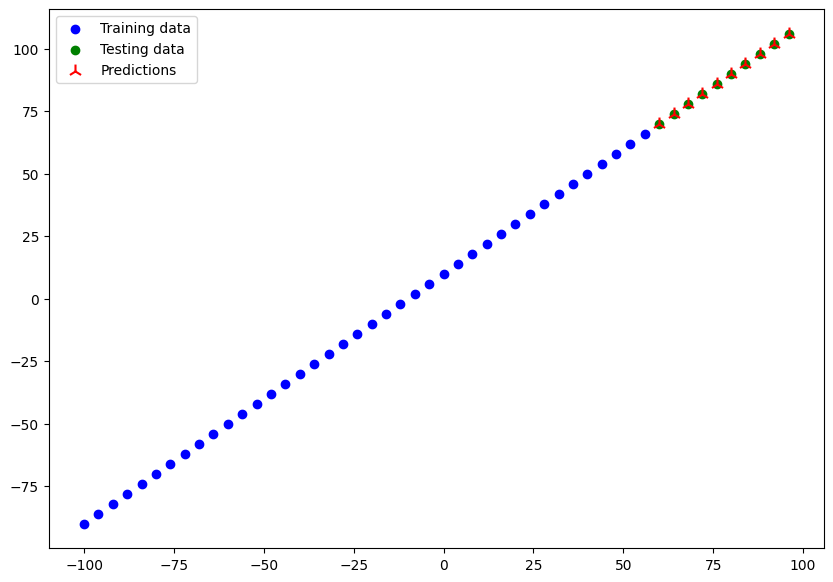

In [ ]:
plot_predictions()

In [ ]:
def mae(test_labels=y_test, predictions=y_pred):
  return tf.reduce_mean(tf.abs(tf.subtract(tf.cast(test_labels, dtype=tf.float32), tf.squeeze(predictions))))

mae()

<tf.Tensor: shape=(), dtype=float32, numpy=9.155274e-06>

In [ ]:
def mse(test_labels=y_test, predictions=y_pred):
  return tf.reduce_mean(tf.square(tf.subtract(tf.cast(test_labels, dtype=tf.float32), tf.squeeze(predictions))))

mse()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0477379e-10>

In [ ]:
model.save("best_model")
model.save("best_model.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/best_model")

In [ ]:
from google.colab import files
files.download("/content/best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
 insurance_one_hot = pd.get_dummies(insurance)
 insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8340.0762 - mae: 8340.0762


[8340.076171875, 8340.076171875]

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4688.8335 - mae: 4688.8335


[4688.83349609375, 4688.83349609375]

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 3ms/step - loss: 13309.5381 - mae: 13309.5381
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13162.4883 - mae: 13162.4883
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12858.4385 - mae: 12858.4385
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12247.2568 - mae: 12247.2568
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11178.9199 - mae: 11178.9199
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9737.6348 - mae: 9737.6348
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8339.6240 - mae: 8339.6240
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7596.2725 - mae: 7596.2725
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7452.1953 - mae: 7452.1953
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7428.9526 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3489.6121 - mae: 3489.6121


[3489.612060546875, 3489.612060546875]

Text(0.5, 0, 'epochs')

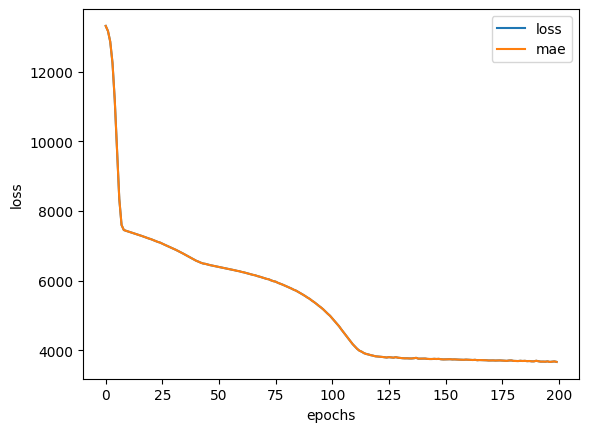

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.huber,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                        metrics=["mae"])

history_4 = insurance_model_4.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 3s 4ms/step - loss: 13305.6299 - mae: 13306.1299
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13172.6494 - mae: 13173.1494
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12964.2051 - mae: 12964.7051
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12605.5547 - mae: 12606.0547
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12005.6270 - mae: 12006.1270
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 11073.5928 - mae: 11074.0928
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 9868.5498 - mae: 9869.0498
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 8624.4482 - mae: 8624.9482
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 7714.0601 - mae: 7714.5601
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7403.7188 - ma

In [ ]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3179.2344 - mae: 3179.7334


[3179.234375, 3179.7333984375]

Text(0.5, 0, 'epochs')

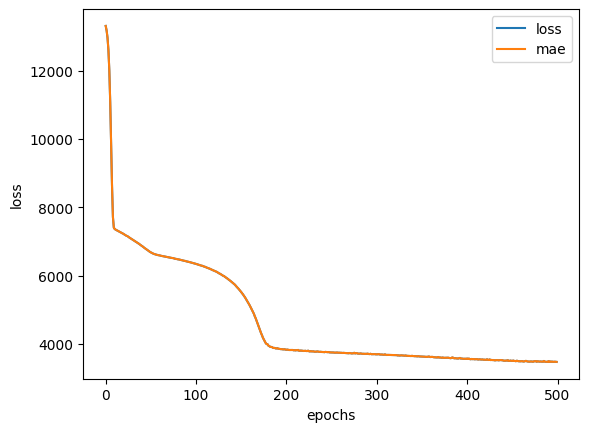

In [ ]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.huber,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                        metrics=["mae"])

history_4 = insurance_model_4.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 3s 4ms/step - loss: 13305.6299 - mae: 13306.1299
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13172.6494 - mae: 13173.1494
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12964.2051 - mae: 12964.7051
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12605.5547 - mae: 12606.0547
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12005.6270 - mae: 12006.1270
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 11073.5928 - mae: 11074.0928
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 9868.5498 - mae: 9869.0498
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 8624.4482 - mae: 8624.9482
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 7714.0601 - mae: 7714.5601
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7403.7188 - ma

In [ ]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3179.2344 - mae: 3179.7334


[3179.234375, 3179.7333984375]

Text(0.5, 0, 'epochs')

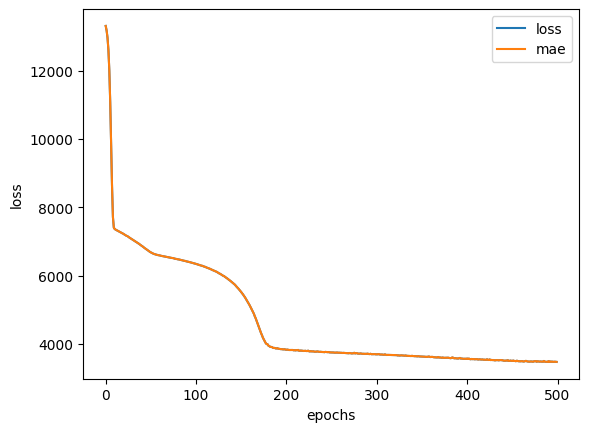

In [ ]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

<Axes: ylabel='Frequency'>

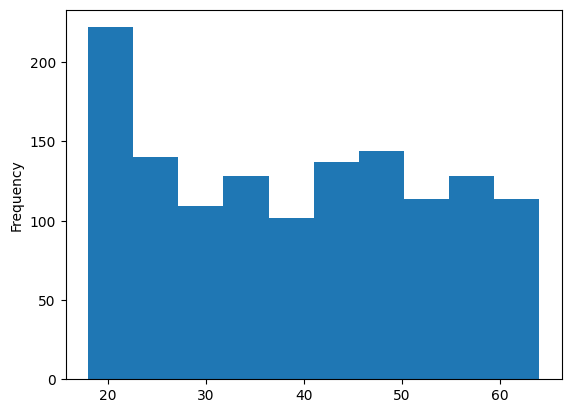

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

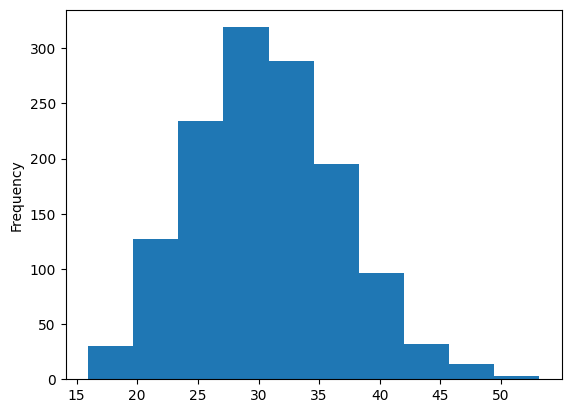

In [ ]:
X["bmi"].plot(kind="hist")

<Axes: ylabel='Frequency'>

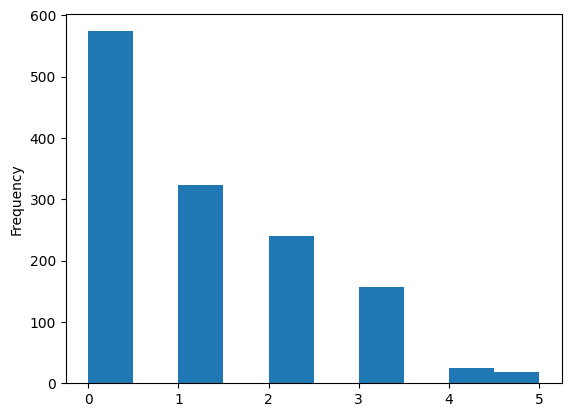

In [ ]:
X["children"].plot(kind="hist")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

ct = make_column_transformer(
    (MinMaxScaler(), ["age","children"]),
    (StandardScaler(),["bmi"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([ 0.60869565,  0.4       , -1.75652513,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

In [ ]:
tf.random.set_seed(42)

insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_5.compile(loss=tf.keras.losses.huber,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                        metrics=["mae"])

history_5 = insurance_model_5.fit(X_train_normal, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 2s 3ms/step - loss: 322453408.0000 - mae: 13346.0156
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 322422464.0000 - mae: 13344.9111
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 322385760.0000 - mae: 13343.5811
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 322337984.0000 - mae: 13341.8525
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 322273440.0000 - mae: 13339.4893
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 322184320.0000 - mae: 13336.2529
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 322061440.0000 - mae: 13331.7695
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 321891008.0000 - mae: 13325.5312
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 321657568.0000 - mae: 13317.0391
Epoch 10/500
34/34 [==========================

In [ ]:
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 33594112.0000 - mae: 4180.4941


[33594112.0, 4180.494140625]

Text(0.5, 0, 'epochs')

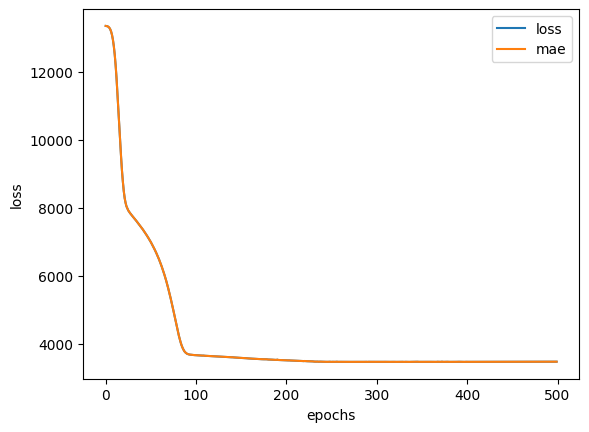

In [ ]:
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Exercise


1.   Import a dataset from kaggle
2.   Explanatory Analysis
3.   Preprocess data (normalize and encode features)
4.   Create a couple of models (implement early stopping callbacks)
5.   Store in a table results  (tensorboard)
6.   Visualize results
7.   Download model

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
X = data.drop(["quality"], axis=1)
y = data["quality"]
#y = pd.get_dummies(y, prefix=[x for x in range(11)], columns=[x for x in range(11)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
data.head(), data.size

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        5  
 2 

In [ ]:
y

,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_3","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_4","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_5","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_6","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_7","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]_8"
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1594,0,0,1,0,0,0
1595,0,0,0,1,0,0
1596,0,0,0,1,0,0
1597,0,0,1,0,0,0


In [ ]:
X_train.head(), y_train.head()

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 731             8.9             0.875         0.13            3.45      0.088   
 216             8.7             0.625         0.16            2.00      0.101   
 367            10.4             0.575         0.61            2.60      0.076   
 1085            6.8             0.480         0.08            1.80      0.074   
 1142            6.9             0.450         0.11            2.40      0.043   
 
       free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 731                   4.0                  14.0  0.99940  3.44       0.52   
 216                  13.0                  49.0  0.99620  3.14       0.57   
 367                  11.0                  24.0  1.00000  3.16       0.69   
 1085                 40.0                  64.0  0.99529  3.12       0.49   
 1142                  6.0                  12.0  0.99354  3.30       0.65   
 
       alcohol  
 731      11.5  
 2

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

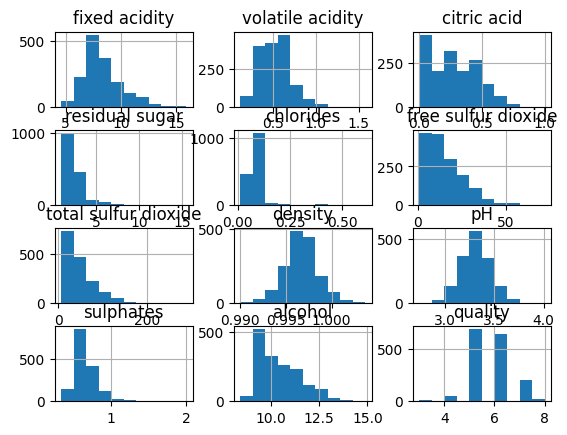

In [ ]:
data.hist()

In [ ]:
normal_col = []
non_normal_col = []
for col in X.columns:
  stat, p = normaltest(X[col])
  if p > 0.001 :
   print(col)
   print(p)
   normal_col.append(col)
  else:
    non_normal_col.append(col)
normal_col, normal_col

([],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'])

In [ ]:
ct = make_column_transformer(
    (StandardScaler(), normal_col),
    (MinMaxScaler(), non_normal_col)
)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal, X_test_normal

(array([[0.32743363, 0.74380165, 0.02      , ..., 0.58267717, 0.09580838,
         0.4       ],
        [0.37168142, 0.26446281, 0.49      , ..., 0.44094488, 0.16167665,
         0.16923077],
        [0.14159292, 0.25619835, 0.22      , ..., 0.61417323, 0.16167665,
         0.16923077],
        ...,
        [0.53097345, 0.58677686, 0.37      , ..., 0.33070866, 0.11377246,
         0.23076923],
        [0.17699115, 0.62809917, 0.04      , ..., 0.62204724, 0.13772455,
         0.23076923],
        [0.33628319, 0.42561983, 0.36      , ..., 0.4488189 , 0.14371257,
         0.30769231]]),
 array([[0.37168142, 0.3553719 , 0.04      , ..., 0.37007874, 0.16167665,
         0.38461538],
        [0.15929204, 0.4214876 , 0.21      , ..., 0.66141732, 0.19760479,
         0.21538462],
        [0.53097345, 0.18181818, 0.49      , ..., 0.35433071, 0.22155689,
         0.24615385],
        ...,
        [0.28318584, 0.39669421, 0.26      , ..., 0.37007874, 0.11377246,
         0.23076923],
        [0.3

In [ ]:
from keras.callbacks import EarlyStopping
def train_model (loss_function=tf.keras.losses.mae,
                 number_layers=1,
                 learning_rate=0.0001,
                 epochs=100,
                 X_train=X_train_normal, y_train=y_train):

  tf.random.set_seed(42)

  model1 = tf.keras.Sequential()

  for i in range(number_layers):
    model1.add(tf.keras.layers.Dense(100))

  model1.add(tf.keras.layers.Dense(1))

  model1.compile(loss=loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=["mae", "mse"])

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=15,
                                                    restore_best_weights=True,
                                                    start_from_epoch=0.2*epochs)
  history1 = model1.fit(X_train, y_train, epochs=epochs,
                        verbose=0, callbacks=[early_stopping])

  return model1, history1, early_stopping.best_epoch, early_stopping.stopped_epoch

In [ ]:
loss_list = ["mae", "mse", "huber"]
layers_list = [1,2,3,4]
epochs_list = [100, 500, 1000]
learning_list = [0.001, 0.0005, 0.0001]


model_list = []
history_list = []
results = []

for loss in loss_list:
  for number_layers in layers_list:
    for epochs in epochs_list:
      for learning_rate in learning_list:

        if loss == "mae":
          loss_function = tf.keras.losses.mae
        elif loss == "mse":
          loss_function = tf.keras.losses.mse
        else:
          loss_function = tf.keras.losses.huber

        model, history, best_epoch, final_epoch = train_model(loss_function,
                                                              number_layers,
                                                              learning_rate,
                                                              epochs,
                                                              X_train_normal,
                                                              y_train)

        model_list.append(model)
        history_list.append(history)

        loss_val, mae, mse = model.evaluate(X_test_normal, y_test)

        results.append([loss, number_layers, epochs, best_epoch, final_epoch,
                        learning_rate, loss_val, mae, mse])


10/10 [==============================] - 0s 3ms/step - loss: 0.1935 - mae: 0.4798 - mse: 0.4132


In [ ]:
resultsDF = pd.DataFrame(results, columns=["loss", "number of layers",
                                           "epochs", "best epoch",
                                           "final epoch",
                                           "learning rate", "loss val",
                                           "mae", "mse"])

resultsDF.head()

,loss,number of layers,epochs,best epoch,final epoch,learning rate,loss val,mae,mse
0,mae,1,100,80,95,0.0010,0.483221,0.483221,0.417123
1,mae,1,100,98,0,0.0005,0.484695,0.484695,0.419931
2,mae,1,100,99,0,0.0001,0.568755,0.568755,0.560669
3,mae,1,500,108,123,0.0010,0.487209,0.487209,0.424239
4,mae,1,500,123,138,0.0005,0.486753,0.486753,0.423360


In [ ]:
resultsDF.sort_values(by="mse")

,loss,number of layers,epochs,best epoch,final epoch,learning rate,loss val,mae,mse
60,mse,3,1000,235,250,0.0010,0.389891,0.475356,0.389891
70,mse,4,1000,235,250,0.0005,0.390298,0.474785,0.390298
102,huber,4,500,123,138,0.0010,0.183185,0.475963,0.391258
49,mse,2,500,116,131,0.0005,0.392369,0.474797,0.392369
68,mse,4,500,116,131,0.0001,0.392740,0.474623,0.392740
...,...,...,...,...,...,...,...,...,...
33,mae,4,1000,209,224,0.0010,0.528827,0.528827,0.483443
47,mse,2,100,99,0,0.0001,0.483939,0.532898,0.483939
74,huber,1,100,99,0,0.0001,0.244774,0.560101,0.544770
2,mae,1,100,99,0,0.0001,0.568755,0.568755,0.560669


In [ ]:
resultsDF.sort_values(by="mae")

,loss,number of layers,epochs,best epoch,final epoch,learning rate,loss val,mae,mse
68,mse,4,500,116,131,0.0001,0.392740,0.474623,0.392740
70,mse,4,1000,235,250,0.0005,0.390298,0.474785,0.390298
49,mse,2,500,116,131,0.0005,0.392369,0.474797,0.392369
104,huber,4,500,123,138,0.0001,0.185555,0.474890,0.396373
10,mae,2,100,59,74,0.0005,0.475009,0.475009,0.402225
...,...,...,...,...,...,...,...,...,...
33,mae,4,1000,209,224,0.0010,0.528827,0.528827,0.483443
47,mse,2,100,99,0,0.0001,0.483939,0.532898,0.483939
74,huber,1,100,99,0,0.0001,0.244774,0.560101,0.544770
2,mae,1,100,99,0,0.0001,0.568755,0.568755,0.560669


In [ ]:
resultsDF.sort_values(by="loss val")

,loss,number of layers,epochs,best epoch,final epoch,learning rate,loss val,mae,mse
102,huber,4,500,123,138,0.0010,0.183185,0.475963,0.391258
103,huber,4,500,123,138,0.0005,0.184065,0.476876,0.393195
94,huber,3,500,123,138,0.0005,0.184861,0.475784,0.394604
104,huber,4,500,123,138,0.0001,0.185555,0.474890,0.396373
75,huber,1,500,100,115,0.0010,0.186130,0.489788,0.401203
...,...,...,...,...,...,...,...,...,...
35,mae,4,1000,209,224,0.0001,0.519686,0.519686,0.467849
16,mae,2,1000,209,224,0.0005,0.521430,0.521430,0.470497
33,mae,4,1000,209,224,0.0010,0.528827,0.528827,0.483443
2,mae,1,100,99,0,0.0001,0.568755,0.568755,0.560669


In [ ]:
aux = 102
best_model = model_list[aux]

In [ ]:
best_model.summary()

Model: "sequential_228"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_762 (Dense)           (None, 100)               1200      
                                                                 
 dense_763 (Dense)           (None, 100)               10100     
                                                                 
 dense_764 (Dense)           (None, 100)               10100     
                                                                 
 dense_765 (Dense)           (None, 100)               10100     
                                                                 
 dense_766 (Dense)           (None, 1)                 101       
                                                                 
Total params: 31,601
Trainable params: 31,601
Non-trainable params: 0
_________________________________________________________________


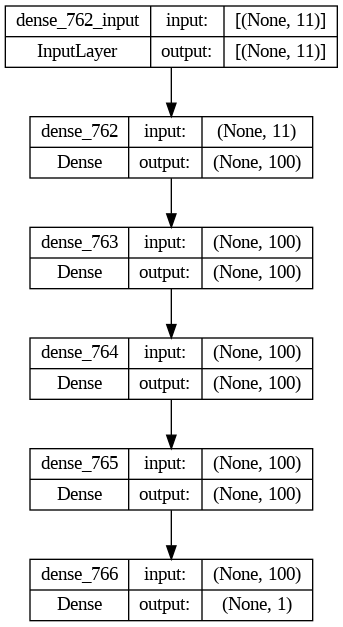

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(best_model, show_shapes=True)

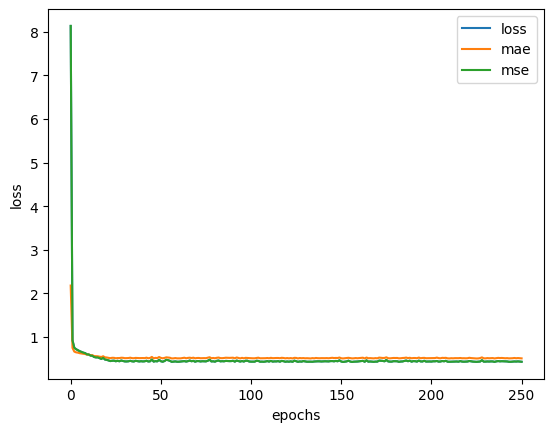

In [ ]:
pd.DataFrame(history_list[70].history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
best_model.save("best_model.h5")

from google.colab import files
files.download("best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>